In [1]:
# -*- coding: utf-8 -*-
#读取mnist数据集字符图片
import torch 
import torchvision
from PIL import Image
import cv2
import numpy as np
import os
import gzip
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline


# 定义加载数据的函数，data_folder为保存gz数据的文件夹，该文件夹下有4个文件
# 'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
# 't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'

def load_data(data_folder):

  files = [
      'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
      't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'
  ]

  paths = []
  for fname in files:
    paths.append(os.path.join(data_folder,fname))

  with gzip.open(paths[0], 'rb') as lbpath:
    y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

  with gzip.open(paths[1], 'rb') as imgpath:
    x_train = np.frombuffer(
        imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)

  with gzip.open(paths[2], 'rb') as lbpath:
    y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

  with gzip.open(paths[3], 'rb') as imgpath:
    x_test = np.frombuffer(
        imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 28, 28)

  return (x_train, y_train), (x_test, y_test)

(train_images, train_labels), (test_images, test_labels) = load_data('../data/MNIST/raw')

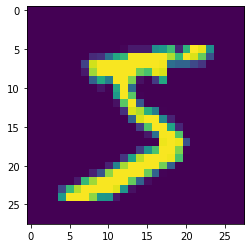

In [2]:
img_raw=train_images[0]
plt.imshow(img_raw)
plt.show()

In [3]:
width=img_raw.shape[0]
height=img_raw.shape[0]

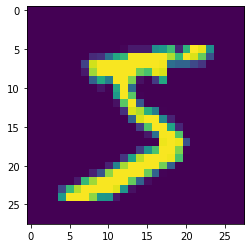

In [4]:
img_raw_PIL = Image.fromarray(img_raw.astype('uint8')).convert('L')
plt.imshow(img_raw_PIL)
plt.show()

In [5]:
correlation=[]
for i in np.arange(1,2,0.001):
    height_scaled=round(height*i)
    img_scaled_PIL=img_raw_PIL.resize((width,height_scaled),Image.ANTIALIAS)
#     plt.imshow(img_scaled_PIL)
#     plt.show()
    img_scaled = np.array(img_scaled_PIL)  #转换为numpy
    img_raw=img_raw.reshape(-1)
    img_scaled=img_scaled.reshape(-1)
#     j=0
#     img_scaled_compressed=np.zeros(img_raw.shape)
#     for i,k in enumerate(img_scaled):
#         if i%2==0: 
#             img_scaled_compressed[j]=k
#             j=j+1
    img_scaled_compressed=img_scaled[0:784]
    temp=np.corrcoef(img_raw,img_scaled_compressed)
    correlation.append(temp[0][1])

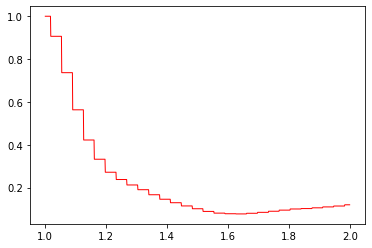

In [6]:
plt.plot(np.arange(1,2,0.001),correlation,color='red', linewidth=1)